## Importing the necessary Libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical analysis
import matplotlib.pyplot as plt # data Visualization
from scipy.sparse import csr_matrix #or creating sparse matrices using multiple data structures
from sklearn.neighbors import NearestNeighbors # machine learning algorithm

## Loading the dataset

In [2]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: Dtype

## Exploratory Data Analysis

In [3]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 
                 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users.columns = ['userID', 'Location', 'Age']
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [4]:
books.head() # return you the top 5 data

ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlM  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [14]:
books.tail() # return you the bottom 5 data

ISBN                                          bookTitle  \
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 bookAuthor yearOfPublication  \
271355       Paula Danziger              1988   
271356           Teri Sloat              1991   
271357     Christine Wicker              2004   
271358                Plato              1996   
271359  Christopher  Biffle              2000   

                                               publisher  \
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                                imageUrlS  \
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                                imageUrlM  \
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                                imageUrlL  
271355  http://images.amazon.com/images/P/0440400988.0...  
271356  http://images.amazon.com/images/P/0525447644.0...  
271357  http://images.amazon.com/images/P/006008667X.0...  
271358  http://images.amazon.com/images/P/0192126040.0...  
271359  http://images.amazon.com/images/P/0767409752.0...

In [6]:
books.head(8)

ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   
5  0399135782                             The Kitchen God's Wife   
6  0425176428  What If?: The World's Foremost Military Histor...   
7  0671870432                                    PLEADING GUILTY   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   
5               Amy Tan              1991            Putnam Pub Group   
6         Robert Cowley              2000    Berkley Publishing Group   
7           Scott Turow              1993                  Audioworks   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   
5  http://images.amazon.com/images/P/0399135782.0...   
6  http://images.amazon.com/images/P/0425176428.0...   
7  http://images.amazon.com/images/P/0671870432.0...   

                                           imageUrlM  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   
5  http://images.amazon.com/images/P/0399135782.0...   
6  http://images.amazon.com/images/P/0425176428.0...   
7  http://images.amazon.com/images/P/0671870432.0...   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...  
5  http://images.amazon.com/images/P/0399135782.0...  
6  http://images.amazon.com/images/P/0425176428.0...  
7  http://images.amazon.com/images/P/0671870432.0...

In [9]:
books.columns # columns names present in the dataset

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [3]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [10]:
books.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
books.describe()

ISBN       bookTitle       bookAuthor  yearOfPublication  \
count       271360          271360           271359             271360   
unique      271360          242135           102023                202   
top     0373056966  Selected Poems  Agatha Christie               2002   
freq             1              27              632              13903   

        publisher                                          imageUrlS  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/044022442X.0...   
freq         7535                                                  2   

                                                imageUrlM  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/039552105X.0...   
freq                                                    2   

                                                imageUrlL  
count                                              271357  
unique                                             271041  
top     http://images.amazon.com/images/P/034081800X.0...  
freq                                                    2

## Data Visualization

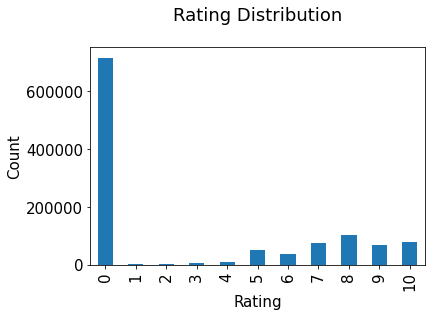

In [4]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

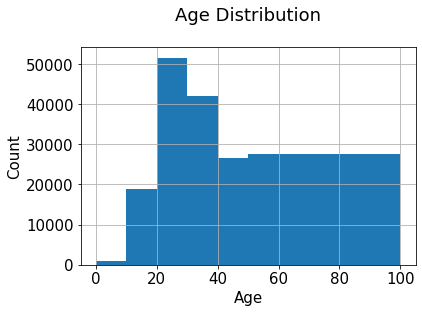

In [7]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

### Selecting only those books which are having more than 100 and 200 bookratings and user

In [15]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [16]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  
0  Politically Correct Bedtime Stories: Modern Ta...  
1  Politically Correct Bedtime Stories: Modern Ta...  
2  Politically Correct Bedtime Stories: Modern Ta...  
3  Politically Correct Bedtime Stories: Modern Ta...  
4  Politically Correct Bedtime Stories: Modern Ta...

### Counting the rating wrt to different books

In [17]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].count().reset_index().
                    rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1

### Merging the total rating count

In [18]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', 
                                                         right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1  Politically Correct Bedtime Stories: Modern Ta...                82  
2  Politically Correct Bedtime Stories: Modern Ta...                82  
3  Politically Correct Bedtime Stories: Modern Ta...                82  
4  Politically Correct Bedtime Stories: Modern Ta...                82

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [20]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


### creating a threshold and selecting those rating only

In [21]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1  Politically Correct Bedtime Stories: Modern Ta...                82  
2  Politically Correct Bedtime Stories: Modern Ta...                82  
3  Politically Correct Bedtime Stories: Modern Ta...                82  
4  Politically Correct Bedtime Stories: Modern Ta...                82

In [22]:
rating_popular_book.shape

(62149, 5)

### Selecting only the specific country considering  the time parameter

In [23]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
3   12538  002542730X          10   
4   13552  002542730X           0   
5   16795  002542730X           0   

                                           bookTitle  totalRatingCount  \
0  Politically Correct Bedtime Stories: Modern Ta...                82   
1  Politically Correct Bedtime Stories: Modern Ta...                82   
3  Politically Correct Bedtime Stories: Modern Ta...                82   
4  Politically Correct Bedtime Stories: Modern Ta...                82   
5  Politically Correct Bedtime Stories: Modern Ta...                82   

                        Location  
0          gilbert, arizona, usa  
1      knoxville, tennessee, usa  
3          byron, minnesota, usa  
4        cordova, tennessee, usa  
5  mechanicsville, maryland, usa

In [24]:

us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', 
                                        columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

us_canada_user_rating_pivot 

userID                                              254     2276    2766    \
bookTitle                                                                    
1984                                                 9.000   0.000   0.000   
1st to Die: A Novel                                  0.000   0.000   0.000   
2nd Chance                                           0.000  10.000   0.000   
4 Blondes                                            0.000   0.000   0.000   
84 Charing Cross Road                                0.000   0.000   0.000   
...                                                    ...     ...     ...   
Year of Wonders                                      0.000   0.000   0.000   
You Belong To Me                                     0.000   0.000   0.000   
Zen and the Art of Motorcycle Maintenance: An I...   0.000   0.000   0.000   
Zoya                                                 0.000   0.000   0.000   
\O\" Is for Outlaw"                                  0.000   0.000   0.000   

userID                                              2977    3363    4017    \
bookTitle                                                                    
1984                                                 0.000   0.000   0.000   
1st to Die: A Novel                                  0.000   0.000   0.000   
2nd Chance                                           0.000   0.000   0.000   
4 Blondes                                            0.000   0.000   0.000   
84 Charing Cross Road                                0.000   0.000   0.000   
...                                                    ...     ...     ...   
Year of Wonders                                      7.000   0.000   0.000   
You Belong To Me                                     0.000   0.000   0.000   
Zen and the Art of Motorcycle Maintenance: An I...   0.000   0.000   0.000   
Zoya                                                 0.000   0.000   0.000   
\O\" Is for Outlaw"                                  0.000   0.000   0.000   

userID                                              4385    6242    6251    \
bookTitle                                                                    
1984                                                 0.000   0.000   0.000   
1st to Die: A Novel                                  0.000   0.000   0.000   
2nd Chance                                           0.000   0.000   0.000   
4 Blondes                                            0.000   0.000   0.000   
84 Charing Cross Road                                0.000   0.000   0.000   
...                                                    ...     ...     ...   
Year of Wonders                                      0.000   7.000   0.000   
You Belong To Me                                     0.000   0.000   0.000   
Zen and the Art of Motorcycle Maintenance: An I...   0.000   0.000   0.000   
Zoya                                                 0.000   0.000   0.000   
\O\" Is for Outlaw"                                  0.000   0.000   0.000   

userID                                              6323    ...  271448  \
bookTitle                                                   ...           
1984                                                 0.000  ...   0.000   
1st to Die: A Novel                                  0.000  ...   0.000   
2nd Chance                                           0.000  ...   0.000   
4 Blondes                                            0.000  ...   0.000   
84 Charing Cross Road                                0.000  ...   0.000   
...                                                    ...  ...     ...   
Year of Wonders                                      0.000  ...   0.000   
You Belong To Me                                     0.000  ...   0.000   
Zen and the Art of Motorcycle Maintenance: An I...   0.000  ...   0.000   
Zoya                                                 0.000  ...   0.000   
\O\" Is for Outlaw"                                  0.

## Model Creation

In [25]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [51]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(
    us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
print(query_index)

388


In [52]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(
            i, us_canada_user_rating_pivot.index[indices.flatten()[i]],))


Recommendations for Peace Like a River:

1: Midwives: A Novel, with distance of 0.7388033306954791:
2: Empire Falls, with distance of 0.7416447359447581:
3: I Capture the Castle, with distance of 0.7455580531822357:
4: Confessions of an Ugly Stepsister : A Novel, with distance of 0.7470459013840087:
5: Bel Canto: A Novel, with distance of 0.7523252708179952:


In [ ]:
import pickle
pickle.dump(model_knn, open('book.pkl', 'wb'))

In [ ]:
us_canada_user_rating_pivot.to_csv('us_canada_user_rating_pivot1.csv')